In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"D:\NirwanaWarehouse\uniWork\Term 7\Capstone\backend\FITTR_API\testing_file.csv")
df.head()

,RIGHT_INDEX
0,0.399882
1,0.398075
2,0.397191
3,0.398573
4,0.414264


In [ ]:
SQUATTING = False
REP = 0
IMPROPER_REP = 0
TRUE_IMPROPER_REP = 0
THR = 155
IMPROPER_THR = 140

for _, record in df.iterrows():
    IMPROPER_SQUAT = record["LEFT_ANGLE"] > IMPROPER_THR and record["RIGHT_ANGLE"] > IMPROPER_THR
    PROPER_SQUAT = record["LEFT_ANGLE"] > THR and record["RIGHT_ANGLE"] > THR
    if PROPER_SQUAT and not IMPROPER_SQUAT and not SQUATTING:
        SQUATTING = True
        REP += 1
    elif IMPROPER_SQUAT:
        IMPROPER_REP += 1
    elif record["LEFT_ANGLE"] < IMPROPER_THR and record["RIGHT_ANGLE"] < IMPROPER_THR and SQUATTING:
        SQUATTING = False

TRUE_IMPROPER_REP = IMPROPER_REP - REP

print(f"Proper Reps: {REP}")
print(f"Improper Reps: {IMPROPER_REP}")
print(f"True Improper Reps: {TRUE_IMPROPER_REP}")


Proper Reps: 5
Improper Reps: 21
True Improper Reps: 16


In [3]:
def apply_ema_smoothing(df, span=10):
    """
    Applies Exponential Moving Average (EMA) smoothing to 'LEFT_ANGLE' and 'RIGHT_ANGLE' columns.

    Args:
        df (pd.DataFrame): Input DataFrame with 'LEFT_ANGLE' and 'RIGHT_ANGLE' columns.
        span (int): Span of the EMA. Higher values result in smoother curves.

    Returns:
        pd.DataFrame: DataFrame with smoothed 'LEFT_ANGLE_EMA' and 'RIGHT_ANGLE_EMA' columns.
    """

    if 'LEFT_ANGLE' not in df.columns or 'RIGHT_ANGLE' not in df.columns:
        raise ValueError("DataFrame must contain 'LEFT_ANGLE' and 'RIGHT_ANGLE' columns.")

    df['LEFT_ANGLE_EMA'] = df['LEFT_ANGLE'].ewm(span=span).mean()
    df['RIGHT_ANGLE_EMA'] = df['RIGHT_ANGLE'].ewm(span=span).mean()

    return df
def livestream_ema_smoothing(current_record,past_record,alpha=0.2):
    if past_record is None:
        return current_record
    else:
        return past_record + alpha * (current_record - past_record)


High Reps: 9
Low Reps: 6


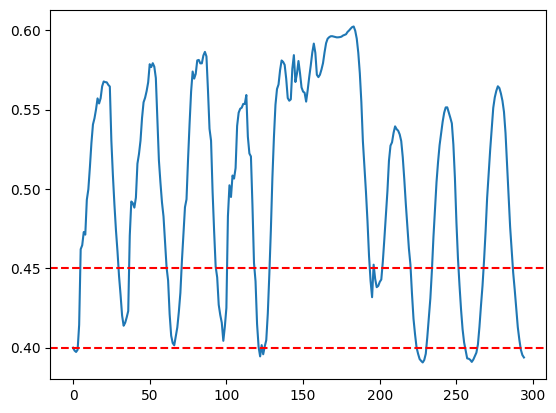

In [12]:
high_thr = 0.45
low_thr = 0.4
high_rep = low_rep = 0
for idx,record in df.iterrows():
    current_val = df.at[idx,"RIGHT_INDEX"]
    prev_val = df.at[idx-1,"RIGHT_INDEX"] if idx > 0 else None
    if current_val > high_thr and (prev_val is None or prev_val < high_thr):
        high_rep += 1
    if current_val < low_thr and (prev_val is None or prev_val > low_thr):
        low_rep += 1
print(f"High Reps: {high_rep}")
print(f"Low Reps: {low_rep}")
plt.plot(df['RIGHT_INDEX'], label='Right Angle')
plt.axhline(y=high_thr, color='r', linestyle='--')
plt.axhline(y=low_thr, color='r', linestyle='--')

In [5]:
import time
import numpy as np

threshold = 155
timestamps = []
frequency = []
above_threshold = False

for index, record in df.iterrows():
    avg_angle = (record["LEFT_ANGLE"] + record["RIGHT_ANGLE"]) / 2
    if avg_angle > threshold and not above_threshold:
        timestamps.append(time.time())  # Append current timestamp
        above_threshold = True
            # Calculate frequency of timestamps per second
        if len(timestamps) > 1:
            time_diffs = np.diff(timestamps)
            freq = 1 / np.mean(time_diffs) if np.mean(time_diffs) != 0 else 0
        else:
            freq = 0
        frequency.append(freq)
    elif avg_angle <= threshold:
        above_threshold = False

    

print(timestamps)
print(frequency)

[1740623983.1912217, 1740623983.1942217, 1740623983.1952233, 1740623983.1982217, 1740623983.2012224, 1740623983.2042248]
[0, 333.3310021457522, 499.79790276453764, 428.5732970027248, 399.971773232251, 384.52336859861754]


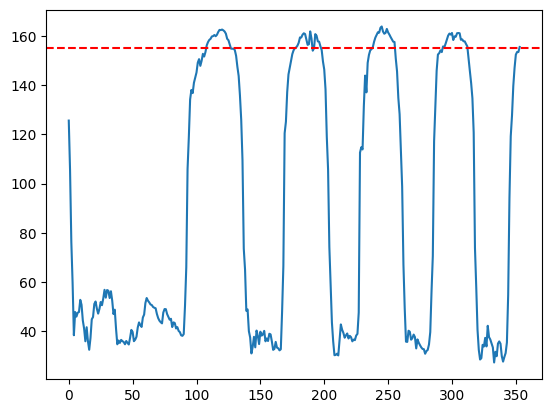

In [ ]:
plt.plot((df["LEFT_ANGLE"]+df['RIGHT_ANGLE'])/2)
plt.axhline(y=155, color='r', linestyle='--')
plt.show()